<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import astar as ast

**Weighted Undirected Graph**

In [44]:
G = nx.gnm_random_graph(100, 500)
for (u, v) in G.edges():
  G.edges[u, v]['weight'] = np.random.randint(0,100)

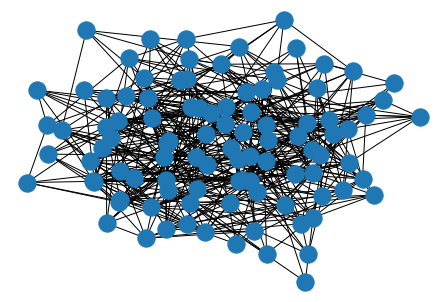

In [45]:
nx.draw(G)
plt.show()

In [46]:
adj = nx.adjacency_matrix(G).toarray()
adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Shortest Path: Dijkstra's, Bellman-Ford, A* Algorithms**

In [47]:
elapsed_dijkstra = []
elapsed_bellman = []
source = np.random.randint(0, 100)
for i in range(10):
  target = np.random.randint(0, 100)

  start_time = time.time()
  dijkstra_path = nx.shortest_path(G, source=source, target=target, weight='weight' ,method='dijkstra')
  elapsed_dijkstra.append(time.time() - start_time)

  start_time = time.time()
  bellman_path = nx.shortest_path(G, source=source, target=target, weight='weight', method='bellman-ford')
  elapsed_bellman.append(time.time() - start_time)

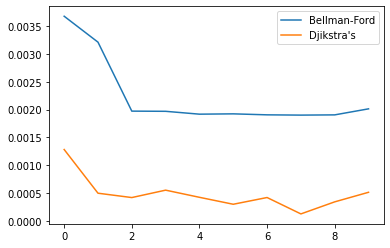

In [48]:
plt.plot(elapsed_bellman, label="Bellman-Ford")
plt.plot(elapsed_dijkstra, label="Djikstra's")
plt.legend()
plt.show()

In [49]:
print("Average time (Dijkstra's Algorithm): ", np.average(elapsed_dijkstra))
print("Average time (Bellman-Ford Algorithm): ", np.average(elapsed_bellman))

Average time (Dijkstra's Algorithm):  0.0004885911941528321
Average time (Bellman-Ford Algorithm):  0.0022384166717529298


**Find Path: A* Algorithm**

In [50]:
grid = np.zeros((100,1))
grid[:30] = 1
np.random.shuffle(grid)
grid = grid.reshape(10, 10)
grid

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]])

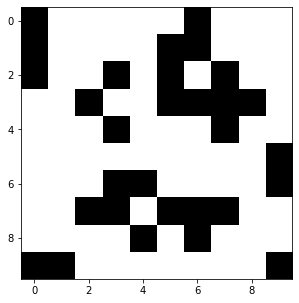

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(grid, cmap=plt.cm.Greys)
plt.show()

In [55]:
elapsed = []
for i in range(5):
  source = (np.random.randint(0,10), np.random.randint(0,10))
  target = (np.random.randint(0,10), np.random.randint(0,10))
  print(source)
  print(target)
  start_time = time.time()
  path = ast.astar(grid, source, target)
  elapsed.append(time.time() - start_time)
  if not path:
    print("No path found. Make sure the target is not on an obstacle")
  else:
    path = path + [source]
    path = path[::-1]
    print(path)

(9, 4)
(7, 4)
[(9, 4), (8, 3), (7, 4)]
(6, 2)
(9, 6)
[(6, 2), (7, 1), (8, 2), (8, 3), (9, 4), (9, 5), (9, 6)]
(8, 3)
(6, 8)
[(8, 3), (7, 4), (6, 5), (6, 6), (6, 7), (6, 8)]
(4, 4)
(8, 7)
[(4, 4), (5, 5), (5, 6), (6, 7), (7, 8), (8, 7)]
(6, 2)
(1, 3)
[(6, 2), (5, 2), (4, 2), (3, 3), (2, 2), (1, 3)]


In [56]:
print(np.average(elapsed))

0.0004582405090332031


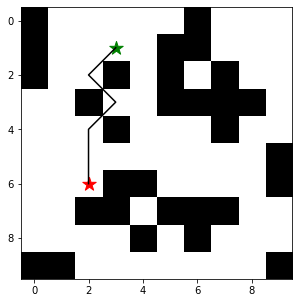

In [57]:
if path:
  x_coords = []
  y_coords = []

  for i in (range(0,len(path))):
      x = path[i][0]
      y = path[i][1]
      x_coords.append(x)
      y_coords.append(y)

  fig, ax = plt.subplots(figsize=(5,5))
  ax.imshow(grid, cmap=plt.cm.Greys)
  ax.scatter(source[1],source[0], marker = "*", color = "red", s = 200)
  ax.scatter(target[1],target[0], marker = "*", color = "green", s = 200)
  ax.plot(y_coords,x_coords, color = "black")
  plt.show()